# ZMLP Search and Display

In [1]:
from zmlp import app_from_env
from zmlp.search import SimilarityQuery
from zw.display import show_asset, show_thumbnails
from zw.proxies import download_proxy
import pprint

## Connect

In [2]:
app = app_from_env()


## Display first 20 assets

In [3]:
search = app.assets.search({"size": 20, "query": { "term": {"system.state": "Analyzed" }}})

show_thumbnails(search)

## Look at one asset by index

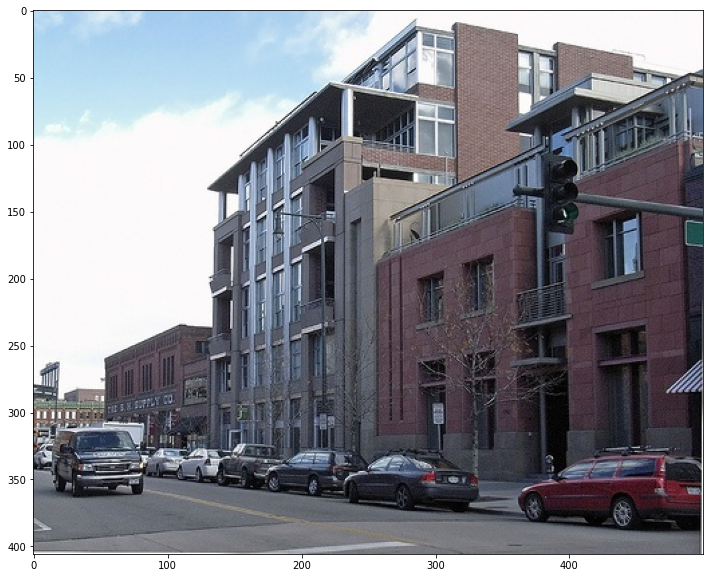

{'analysis': {'zvi-image-similarity': {'simhash': 'DPGCAPPOEPHIPPLPPCPOMDPLPOLBMFPKMOPOFPGCAPHLPPIPGPBCNPDDEHPJNAEMHODFNKIPMPHDPEEPCOPDGGIPPJPFPENEKDPIDBPFPPPPGDJBPANNFFAPPPKEACDDGCHPAPHCPEPPPPMBIHPCPPPJPOFKLDHPPPOBPLCKDCMBPGANEPHPDPLGLPBNJPHCPPEIHAPGPPPEPPPPMONEFNILJAPOKBNKGPPGKPCGBEFPPPJCKNFFBPPPPPPHLKHLPIIIBPJLFPPAOOPMPPAPMFIGHPIPPCPEPFPGPMMPGGAEPDHBDIBCGCJCPPCDPIGCANPPNGAHPPPPPPCPPGJNPPPMEBHPFPMPBPPPPJPEPPEPPECCCPDPHKCFFPCJPCAJLLPJEADPLFPHEPDPCPPLPPPCPEFDELPEMHMPPLPPHDPGPPPPCIAGPILNMLPBAFOPIIDEPPPPIPPBEJMAEIPLDAAPPPPPPFMEPJJGPMODJPHIBGPDPBKCKEPPPBIPOGCCCJPAJNNPPPCMLPBOBIEFFEIPAPKLGEFPLHPEPPNPBPMPFAMGPPPEPBCFOPBPMBDCIFBLPPGIPFEPJEEHGPKPFMPAPPALPCLNPBLJGPKAEGPPJPGKEPLFAPGBNDPEKBGJPEPPCCEGJBHDHNBDPPFGHPPPPHFPPPEFNBPPADEGFHPPDGPPFHEPPBBPKIAPFECHACPPCPFGGJNBGPPKLBNPFAOMPONAPJIPHPPJFBFPOPJLEDFPFHGLPNMAHIKEPPBMMPIJLPPKOBPPBDBDPJDJPLDPPEJPHPEAJPPEIPEPIPGKICPIOEMPFDNCCPBFFBIEDGPGFOHFICPCEOPPFLLOHDOPOPDOJPPGPABOPMNPBPPHHIJCPOAFHMPPGPPPPPAILHKPJMMEPPDEFHKEDBKAKPGPAPFKLDEPHPBIPCPPOFPAEDPBEJBFP

In [4]:
asset = search[2]

show_asset(asset)

pprint.pprint(asset.document)

## Do a similarity search

In [5]:
h = asset.document['analysis']['zvi-image-similarity']['simhash']

min_score = 0.75

q = {
    "query": {
        "bool": {
            "must": [
                SimilarityQuery(h)
            ]
        }
    }
}



search = app.assets.search(q)

show_thumbnails(search)

In [6]:
detections = asset.document['analysis']['zvi-object-detection']

In [7]:
detections

{'type': 'labels',
 'count': 9,
 'predictions': [{'label': 'car',
   'score': 1.0,
   'bbox': [0.458, 0.813, 0.668, 0.921]},
  {'label': 'car', 'score': 0.995, 'bbox': [0.214, 0.803, 0.292, 0.865]},
  {'label': 'car', 'score': 0.994, 'bbox': [0.168, 0.803, 0.23, 0.857]},
  {'label': 'car', 'score': 0.993, 'bbox': [0.728, 0.81, 0.99, 0.951]},
  {'label': 'car', 'score': 0.992, 'bbox': [0.342, 0.808, 0.508, 0.892]},
  {'label': 'car', 'score': 0.986, 'bbox': [0.268, 0.793, 0.37, 0.874]},
  {'label': 'traffic light',
   'score': 0.954,
   'bbox': [0.762, 0.266, 0.812, 0.404]},
  {'label': 'truck', 'score': 0.738, 'bbox': [0.026, 0.766, 0.17, 0.894]},
  {'label': 'car', 'score': 0.723, 'bbox': [0.002, 0.8, 0.022, 0.84]}]}

In [10]:
detections["predictions"][2]

{'label': 'car', 'score': 0.994, 'bbox': [0.168, 0.803, 0.23, 0.857]}

In [12]:
app.models.